In [5]:
# 1/20/2020 20 threads, 40G
    #read csv: wall time: 7min 45s
    #read dta: Wall time: 1h 3min 45s
    
# 1/21/2020 20 threads, 100G
    #read csv: Wall time: 5min 48s
    #read dta: Wall time: 37min 3s
    
# 1/21/2020 1:54PM, 20 threads, 100G
    #read csv: Wall time: 8min 16s
    #read dta: Wall time: 

In [18]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 20)
!date

Fri Jan 24 15:39:07 PST 2020


# 2010 census demo data. Looking at AIAN in urban areas: looking for the downward bias in DP counts ala Akee's findings

Akee's talk here: https://vimeo.com/380264104

In [7]:
##Encoding of the AIANHH var:
#0001–4999 Federally recognized American Indian reservation and/or off-reservation trust land
#5000–5499 Hawaiian home land 5500–5999 Oklahoma tribal statistical area
#5500–5999 Oklahoma tribal statistical area
#6000–7999 Alaska Native village statistical area
#8000–8999 Tribal designated statistical area
#9000–9499 State-recognized American Indian reservation
#9500–9998 State designated tribal statistical area 

In [8]:
location_cols = ['STATE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK']

race_cols = ['P0030005','P0060004'] # AIAN alone, AIAN combo
keep_cols = location_cols + race_cols

def my_cols(x):
    if x.startswith('P001'):
        return True
    elif x.startswith(('AIAN','AITS','TTRACT','TBLGRP','UA','UR')):
        return True
    else:
        return (x in keep_cols)

In [9]:
%%time

df_dp = pd.read_csv('/home/j/temp/abie/fiftystates2010dhc.csv', usecols=my_cols)

<string>:2: DtypeWarning: Columns (28,32,33,47,49,50) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 5min 21s, sys: 22.3 s, total: 5min 43s
Wall time: 6min


In [10]:
dta_columns = [x.lower() for x in df_dp.columns] #grab col names as lowercase
dta_columns[-3:] = df_dp.columns[-3:] #coded vars are capitalized
dta_columns #check contents

['state',
 'county',
 'tract',
 'blkgrp',
 'block',
 'aianhh',
 'aianhhfp',
 'aianhhcc',
 'aitsce',
 'aits',
 'aitscc',
 'ttract',
 'ua',
 'uasc',
 'uatype',
 'ur',
 'aianhhns',
 'aitsns',
 'aianhhsc',
 'P0010001',
 'P0030005',
 'P0060004']

In [11]:
#%%time

#r = pd.read_stata('/home/j/temp/abie/all50states_2010ur1_all_vars.dta', columns=dta_columns,
                  chunksize=100_000, convert_missing=True, preserve_dtypes=False)

#df_sf = pd.DataFrame()
#for t in r:
#    print('.', flush=True, end=' ')
#    df_sf = df_sf.append(t[t.block != ''])
#df_sf.shape

#saved AIAN-relevant vars here; loads faster than the .dta
df_sf = pd.read_csv('/home/j/temp/beatrixh/all50states_AIAN_plus_ua_ur_sf.csv')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . CPU times: user 25min 46s, sys: 9min 17s, total: 35min 3s
Wall time: 39min 15s


(11071790, 22)

In [12]:
#df_sf.to_csv(r'/home/j/temp/beatrixh/all50states_AIAN_plus_ua_ur_sf.csv', index = None, header=True)

In [14]:
df_sf.columns = [x.upper() for x in df_sf.columns]
df_sf.head

<bound method NDFrame.head of          STATE COUNTY   TRACT BLKGRP BLOCK AIANHH AIANHHFP AIANHHCC AITSCE  \
59          02    013  000100      1  1363   9999    99999       99    999   
60          02    013  000100      1  1366   9999    99999       99    999   
61          02    013  000100      1  1369   9999    99999       99    999   
62          02    013  000100      1  1370   6030    01095       E1    999   
63          02    013  000100      1  1371   6030    01095       E1    999   
...        ...    ...     ...    ...   ...    ...      ...      ...    ...   
13713616    56    045  951100      1  1868   9999    99999       99    999   
13713617    56    045  951100      1  1869   9999    99999       99    999   
13713618    56    045  951100      1  1870   9999    99999       99    999   
13713619    56    045  951100      1  1871   9999    99999       99    999   
13713622    56    045  951100      2  2985   9999    99999       99    999   

           AITS  ...     UA UASC 

In [17]:
df_dp.dtypes

STATE         int64
COUNTY      float64
TRACT       float64
BLKGRP      float64
BLOCK       float64
             ...   
AITSNS      float64
AIANHHSC    float64
P0010001      int64
P0030005      int64
P0060004      int64
Length: 22, dtype: object

In [16]:
#store columns by type
float_cols = list(df_dp.loc[:, df_dp.dtypes == np.float64].columns)
int_cols = df_dp.loc[:, df_dp.dtypes == np.int64].columns

#conver df_sf to correct dtypes
df_sf.loc[:,float_cols] = df_sf.loc[:,float_cols].astype(np.float64)
df_sf.loc[:,int_cols] = df_sf.loc[:,int_cols].astype(np.int64)

#check
df_sf.dtypes

STATE         int64
COUNTY      float64
TRACT       float64
BLKGRP      float64
BLOCK       float64
             ...   
AITSNS      float64
AIANHHSC    float64
P0010001      int64
P0030005      int64
P0060004      int64
Length: 22, dtype: object

In [49]:
left = df_sf[location_cols + race_cols + ['P0010001']]
df = pd.merge(left[(left.BLOCK != '')], df_dp.dropna(subset=['BLOCK']), left_on=location_cols, right_on=location_cols, suffixes=('_SF', '_DP'))
df

/share/code/beatrixh/miniconda/envs/beatrix/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,STATE,COUNTY,TRACT,BLKGRP,BLOCK,P0030005_SF,P0060004_SF,P0010001_SF,AIANHH,AIANHHFP,...,UA,UASC,UATYPE,UR,AIANHHNS,AITSNS,AIANHHSC,P0010001_DP,P0030005_DP,P0060004_DP
0,2,13.0,100.0,1.0,1363.0,5,0,24,9999.0,99999.0,...,99999,NaN,9,R,99999999.0,99999999.0,NaN,87,0,42
1,2,13.0,100.0,1.0,1366.0,0,0,0,9999.0,99999.0,...,99999,NaN,9,R,99999999.0,99999999.0,NaN,0,0,0
2,2,13.0,100.0,1.0,1369.0,0,0,0,9999.0,99999.0,...,99999,NaN,9,R,99999999.0,99999999.0,NaN,0,0,0
3,2,13.0,100.0,1.0,1370.0,0,0,0,6030.0,1095.0,...,99999,NaN,9,R,2418758.0,99999999.0,NaN,0,0,0
4,2,13.0,100.0,1.0,1371.0,438,27,942,6030.0,1095.0,...,99999,NaN,9,R,2418758.0,99999999.0,NaN,988,361,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11071785,56,45.0,951100.0,1.0,1868.0,0,0,0,9999.0,99999.0,...,99999,NaN,9,R,99999999.0,99999999.0,NaN,0,0,0
11071786,56,45.0,951100.0,1.0,1869.0,0,0,0,9999.0,99999.0,...,99999,NaN,9,R,99999999.0,99999999.0,NaN,0,0,0
11071787,56,45.0,951100.0,1.0,1870.0,0,0,0,9999.0,99999.0,...,99999,NaN,9,R,99999999.0,99999999.0,NaN,0,0,0
11071788,56,45.0,951100.0,1.0,1871.0,0,0,0,9999.0,99999.0,...,99999,NaN,9,R,99999999.0,99999999.0,NaN,0,0,0


In [89]:
#subset to urban areas, grouped by county
urban_county = df[df.UR== 'U'].copy(deep=True)
urban_county = urban_county.groupby(['STATE','COUNTY'])['P0030005_SF','P0030005_DP','P0060004_SF','P0060004_DP','P0010001_SF','P0010001_DP'].apply(lambda x : x.astype(int).sum())
urban_county

P0030005_SF  P0030005_DP  P0060004_SF  P0060004_DP  P0010001_SF  \
STATE COUNTY                                                                    
1     1.0             415          420          308          291        31650   
      3.0            1013          882         1065         1156       105205   
      5.0              70           69           98           85         8844   
      7.0               9            1           35           52         7252   
      9.0              37           13           71           43         5760   
...                   ...          ...          ...          ...          ...   
56    37.0            323          296          644          597        39024   
      39.0            156          107          162          135        11407   
      41.0             36           15          265          261        12017   
      43.0             34           30          122          150         5465   
      45.0              8            0           82          115         3277   

              P0010001_DP  
STATE COUNTY               
1     1.0           31436  
      3.0          104615  
      5.0            8780  
      7.0            7069  
      9.0            5435  
...                   ...  
56    37.0          38482  
      39.0          11032  
      41.0          11554  
      43.0           5433  
      45.0           3191  

[2440 rows x 6 columns]

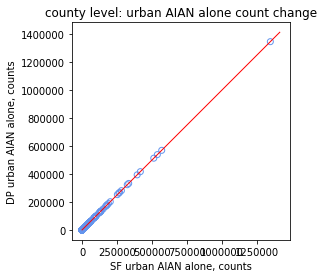

In [91]:
#plot urban areas by county, dp vs sf
x = urban_county[["P0030005_SF"]]
y = urban_county[["P0030005_DP"]]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')


ratio = 1
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

ax.plot([-1,xright],[-1,ytop], 'red', linewidth=1)
#ax.axis([0,xright,0,top])

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('county level: urban AIAN alone count change')

plt.show()

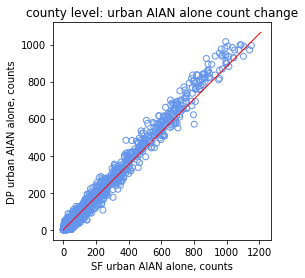

In [90]:
#let's zoom in
x = urban_county[(ur_county.P0030005_DP<1e3) | (ur_county.P0030005_SF<1e3)][["P0030005_SF"]]
y = urban_county[(ur_county.P0030005_DP<1e3) | (ur_county.P0030005_SF<1e3)][["P0030005_DP"]]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')


ratio = 1
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

ax.plot([-1,xright],[-1,ytop], 'red', linewidth=1)
#ax.axis([0,xright,0,top])

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('county level: urban AIAN alone count change')

plt.show()

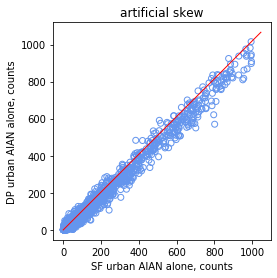

In [92]:
#oops
#same zoom -- need to be careful not to only subset on either SF or DP,
#as the counts change enough for this to significantly skew
x = urban_county[(ur_county.P0030005_SF<1e3)][["P0030005_SF"]]
y = urban_county[(ur_county.P0030005_SF<1e3)][["P0030005_DP"]]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')


ratio = 1
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

ax.plot([-1,xright],[-1,ytop], 'red', linewidth=1)
#ax.axis([0,xright,0,top])

plt.xlabel('SF urban AIAN alone, counts')
plt.ylabel('DP urban AIAN alone, counts')
plt.title('artificial skew')

plt.show()

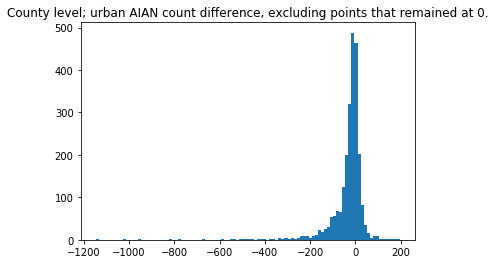

In [96]:
#check out count difference
urban_county['abs_diff'] = urban_county['P0030005_DP'] - urban_county['P0030005_SF']

#plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(urban_county[(urban_county.P0030005_DP!=0) | (urban_county.P0030005_SF!=0)].abs_diff, bins = 100)

plt.title('County level; urban AIAN count difference, excluding points that remained at 0.')

plt.show() 

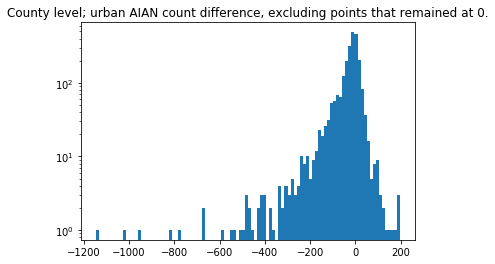

In [97]:
#zoom in (counts in log space)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(urban_county[(urban_county.P0030005_DP!=0) | (urban_county.P0030005_SF!=0)].abs_diff, bins = 100)
plt.yscale('log')

plt.title('County level; urban AIAN count difference, excluding points that remained at 0.')

plt.show() 